# Subspace Inference based on Weight distribution

### Load parameters

In [1]:
using NPZ
using Plots
using Flux
using Flux: Data.DataLoader
using Flux: @epochs
using Plots
using BSON: @save
using BSON: @load
using Zygote
using Statistics
using Revise
using SubspaceInference


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1278
┌ Info: Precompiling SubspaceInference [706446a6-0e85-4c47-b731-c658bbb72625]
└ @ Base loading.jl:1278


### set root

In [3]:
root = pwd();
cd(root);

### Load and format data

In [4]:
data_ld = npzread("data.npy");
x, y = (data_ld[:, 1]', data_ld[:, 2]');
function features(x)
    return vcat(x./2, (x./2).^2)
end

f = features(x);
data =  DataLoader(f,y, batchsize=50, shuffle=true);

### Setup NN model

In [5]:
m = Chain(
	Dense(2,200,Flux.relu), 
	Dense(200,50,Flux.relu),
	Dense(50,50,Flux.relu),
	Dense(50,50,Flux.relu),
	Dense(50,1),
)


θ, re = Flux.destructure(m);

L(m, x, y) = Flux.Losses.mse(m(x), y)/2;
ps = Flux.params(m);
opt = Momentum(0.01, 0.95);

### Pretrain model

In [6]:
## update cost function to suite for flux training
#L(x, y) = Flux.Losses.mse(m(x), y)/2;
#@epochs 3000 Flux.train!(L, ps, data, opt)

This notebook, we are using a pretrained model

In [7]:
i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

### Run subspace inference

In [46]:
M = 3
T = 10
c = 1
itr = 10_00

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=1
);

Traing loss: 0.0016243565529392256 Epoch: 1
Traing loss: 0.0008187952413223432 Epoch: 2
Traing loss: 0.0014285451527866044 Epoch: 3
Traing loss: 0.001045416991168331 Epoch: 4
Traing loss: 0.00151166937444283 Epoch: 5
Traing loss: 0.0015541318039312734 Epoch: 6
Traing loss: 0.0009901695250411535 Epoch: 7
Traing loss: 0.0016119794180710922 Epoch: 8
Traing loss: 0.0010579249039489192 Epoch: 9
Traing loss: 0.0007487880522972378 Epoch: 10
Traing loss: 0.0017735882487252307 Epoch: 11
Traing loss: 0.001135641148267199 Epoch: 12
Traing loss: 0.0011866111185175488 Epoch: 13
Traing loss: 0.0008500337081631049 Epoch: 14
Traing loss: 0.0009045368038954571 Epoch: 15
Traing loss: 0.001261182633698379 Epoch: 16
Traing loss: 0.0010121518189731037 Epoch: 17
Traing loss: 0.0013688528654025233 Epoch: 18
Traing loss: 0.0012251079224960648 Epoch: 19
Traing loss: 0.001351289347070299 Epoch: 20
Traing loss: 0.0013658309070593332 Epoch: 21
Traing loss: 0.0021288343991567606 Epoch: 22
Traing loss: 0.0014416396

### Plot inference

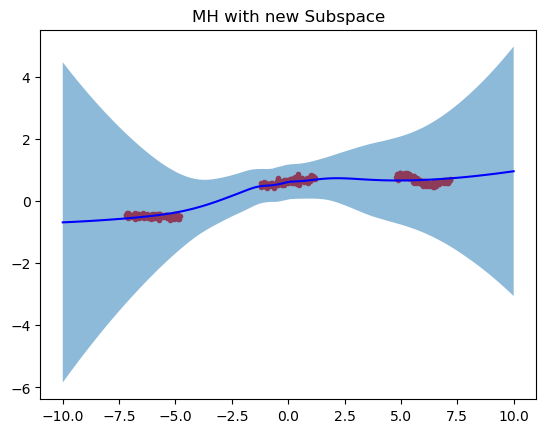

In [47]:
ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end
all_trajectories = Dict()
all_trajectories["1"] = trajectories
SubspaceInference.plot_predictive(data_ld, all_trajectories, z, title=["MH with new Subspace"])

### Comparison of Different Subspaces

- M = 3,6,10,20
- T = 10
- c = 1
- itr = 10_00

In [16]:
T = 10
c = 1
itr = 10_00
all_trajectories = Dict()

Dict{Any,Any}()

In [17]:
M = 3

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["1"] = trajectories;


Traing loss: 0.0014843233923065124 Epoch: 10


In [18]:
M = 6

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end
all_trajectories["2"] = trajectories;

Traing loss: 0.0013836823648454377 Epoch: 10


In [19]:
M = 10

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end
all_trajectories["3"] = trajectories;

Traing loss: 0.0009117902682129219 Epoch: 10


In [20]:
M = 20

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end
all_trajectories["4"] = trajectories;

Traing loss: 0.0014313284948562544 Epoch: 10


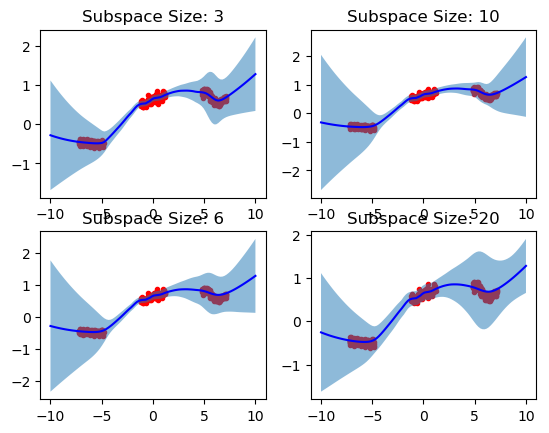

In [21]:
title = ["Subspace Size: 3", "Subspace Size: 6","Subspace Size: 10","Subspace Size: 20"]
SubspaceInference.plot_predictive(data_ld, all_trajectories, z, title=title)

### Comparison of Different Iterations

- M = 3
- T = 10
- c = 1
- itr = 10_00, 20_00, 50_00, 10_000

In [22]:
M = 3
T = 10
c = 1
all_trajectories = Dict()

Dict{Any,Any}()

In [24]:
itr = 10_00

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["1"] = trajectories;


Traing loss: 0.0011500239343088746 Epoch: 10


In [27]:
itr = 20_00

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["2"] = trajectories;

Traing loss: 0.0010633690585833567 Epoch: 10


In [28]:
itr = 50_00

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["3"] = trajectories;

Traing loss: 0.0015443081714843299 Epoch: 10


In [29]:
itr = 10_000

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["4"] = trajectories;

Traing loss: 0.001524985371526597 Epoch: 10


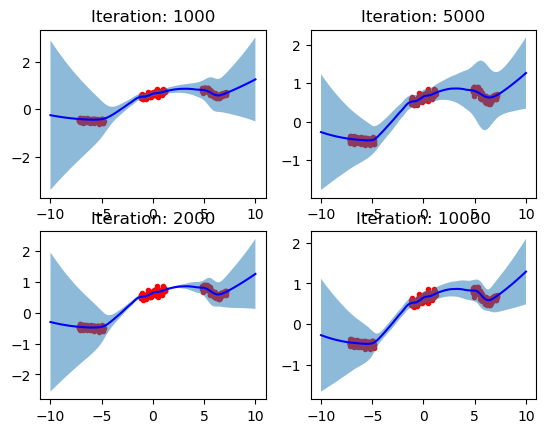

In [30]:
title = ["Iteration: 1000", "Iteration: 2000","Iteration: 5000","Iteration: 10000"]
SubspaceInference.plot_predictive(data_ld, all_trajectories, z, title=title)

### Comparison of Different Epochs for Subspace construction

- M = 3
- T = 10, 20, 30, 40
- c = 1
- itr = 10_00

In [31]:
M = 3
c = 1
itr = 10_00
all_trajectories = Dict()

Dict{Any,Any}()

In [33]:
T = 10

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["1"] = trajectories;

Traing loss: 0.001103426141802153 Epoch: 10


In [34]:
T = 20

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["2"] = trajectories;

Traing loss: 0.0009864316150628395 Epoch: 20


In [35]:
T = 30

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["3"] = trajectories;

Traing loss: 0.002155321170959068 Epoch: 30


In [36]:
T = 40

i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["4"] = trajectories;

Traing loss: 0.0010624411727971506 Epoch: 40


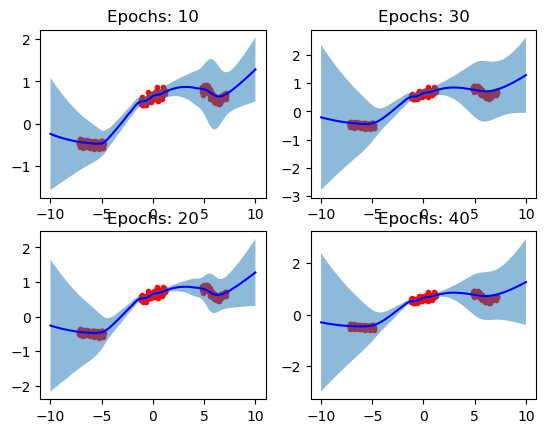

In [37]:
title = ["Epochs: 10", "Epochs: 20","Epochs: 30","Epochs: 40"]
SubspaceInference.plot_predictive(data_ld, all_trajectories, z, title=title)

### Comparison of Different Moment Update Frequency

- M = 3
- T = 30
- c = 1, 2, 5, 10
- itr = 10_00

In [38]:
T = 30
M = 3
itr = 10_00
all_trajectories = Dict()

Dict{Any,Any}()

In [40]:
c = 1
i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["1"] = trajectories;

Traing loss: 0.0008013487418880239 Epoch: 30


In [41]:
c = 2
i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["2"] = trajectories;

Traing loss: 0.0013781723734207052 Epoch: 30


In [42]:
c = 5
i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["3"] = trajectories;

Traing loss: 0.001077821689414069 Epoch: 30


In [43]:
c = 10
i = 1;
@load "model_weights_$(i).bson" ps;
Flux.loadparams!(m, ps);

chn, W_swa, re = SubspaceInference.subspace_inference(m, L, data, opt,
	σ_z = 10.0,	σ_m = 10.0, σ_p = 10.0,
	itr =itr, T=T, c=c, M=M, print_freq=T
);

ms, ns = size(chn)
z = collect(range(-10.0, 10.0,length = 100))
inp = features(z')
trajectories = Array{Float64}(undef,100,ns-1)
for i in 2:ns
	mn = re(chn[:,i])
	out = mn(inp)
	trajectories[:, i-1] = out'
end

all_trajectories["4"] = trajectories;

Traing loss: 0.0008408144371062409 Epoch: 30


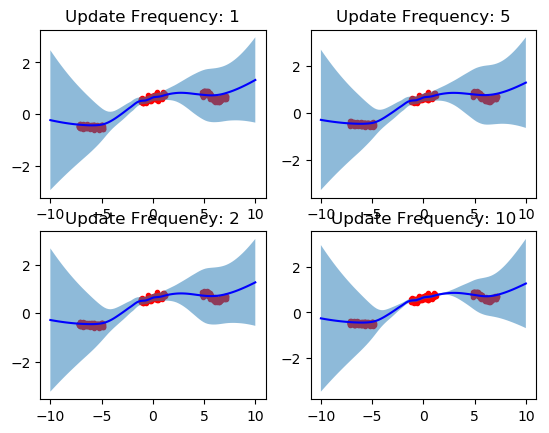

In [44]:
title = ["Update Frequency: 1", "Update Frequency: 2","Update Frequency: 5","Update Frequency: 10"]
SubspaceInference.plot_predictive(data_ld, all_trajectories, z, title=title)